# Imports 

In [1]:
from pdb import run
from unittest import case
import emcee
import corner
import pickle
from tqdm import tqdm
import numpy as np
from qutip import *
from multiprocess import Pool
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution, basinhopping
from IPython.display import display, Math
from scipy.stats import chi2
from protocolsClass import Hamiltonian_Fitter,State
import matplotlib.pyplot as plt
 


# Measurement Data

In [ ]:
ground_meas = np.array([7512786.3, 6847127.7, 6180056.7, 5510661.7, 4837199., 4156107.7, 3459061.2, 2730533.1, 1787541.6]) * 1e-3 # [kHz]
manu_ramsey_meas = np.array([-134296, -133678, -132898, -131896, -130532, -128697, -125952, -124533, -88889]) * 1e-3 # [kHz]
full_meas = np.concatenate((ground_meas,manu_ramsey_meas))

d_ground_meas = np.array([0.00014954, 0.00014637, 0.00017545, 0.00015029, 0.00012487, 0.00017868, 0.00013939, 0.00012705, 0.00021763])# [kHz]
d_manu_ramsey_meas = np.array([0.03552449, 0.03082249, 0.02343234, 0.02998403, 0.0356164,  0.01894326, 0.02569785, 0.02447841, 0.02423604])# [kHz]
d_full_meas = np.concatenate((d_ground_meas,d_manu_ramsey_meas))

A_perp_meas = 105 # [kHz] | Measured through the Raman Rabi experiment
A_simu = np.array([[-436.6,    0.,   -41.3],
                    [  -0.,  -448.4,    0. ],
                    [ -88.5,    0.,   129.8]])


fitter_ground = Hamiltonian_Fitter(ground_meas,d_ground_meas,State.Ground)
fitter_excited = Hamiltonian_Fitter(ground_meas + manu_ramsey_meas,d_ground_meas,State.Excited)
fitter_full = Hamiltonian_Fitter(full_meas,d_full_meas,State.Full, meas_Aperp = A_perp_meas,simu_A= A_simu)

# Fitted Values and Guesses

In [3]:
guess_exicted = [446.3, -237.1,  149.5,   10.65, 0.6]
guess_exicted = [ 4.43614051e+02 ,-2.36794019e+02, 1.49286163e+02, 1.59948409e+01,1.12819327e-01] #1RUN 
guess_exicted = [ 4.43614051e+02 ,-2.36794019e+02, 1.49286163e+02, 1.59948409e+01,1.12819327e-01] #1RUN 
guess_exicted = [ 4.43613977e+02, -2.36793936e+02, 1.49286932e+02, 1.59926691e+01, 1.11464109e-01]

guess_ground = [4.60832e+02, -2.37368e+02,  1.25900e+00, -4.00000e-03, 1.53400e+00] 
guess_ground = [ 456.14443873 ,-237.12801178 , 148.54641495 ,   7.46758762 , 374.08954251] # RUN1
guess_ground  =  [ 456.0840477 , -237.22287091 , 149.38269055  ,  8.26172301 , 374.01006077] #RUN2
guess_ground = [ 456.08283005, -237.22462143,  149.39880504,    8.29825619,  374.0529795 ] #RUN3


guess_full = np.array([4.498e+02,  1.299e+02, -2.370e+02, -1.190e+01, -1.492e+02,  1.500e+00, -8.000e-01,  1.000e-01])
best_x =  [ 4.49821745e+02,  1.29897714e+02 ,-2.37052323e+02, -1.19458723e+01, -1.49320580e+02,  1.57442624e+00, -8.21616775e-01 , 7.88331359e-02]
median_x =  [ 4.49821749e+02,  1.29897911e+02, -2.37052291e+02, -1.19454405e+01, -1.49320418e+02,  1.57449384e+00, -8.21746234e-01,  7.89184735e-02]

# Ground

In [3]:
fitter_ground.run_MCMC(guess_ground)

NameError: name 'fitter_ground' is not defined

# excited

100%|██████████| 10000/10000 [06:47<00:00, 24.52it/s]


median x :  [ 4.43609547e+02 -2.36802093e+02  1.49348904e+02  1.60707624e+01
  1.39322168e-01]
best x :  [ 4.43609544e+02 -2.36802098e+02  1.49348950e+02  1.60708031e+01
  1.39332229e-01]


TypeError: can't multiply sequence by non-int of type 'float'

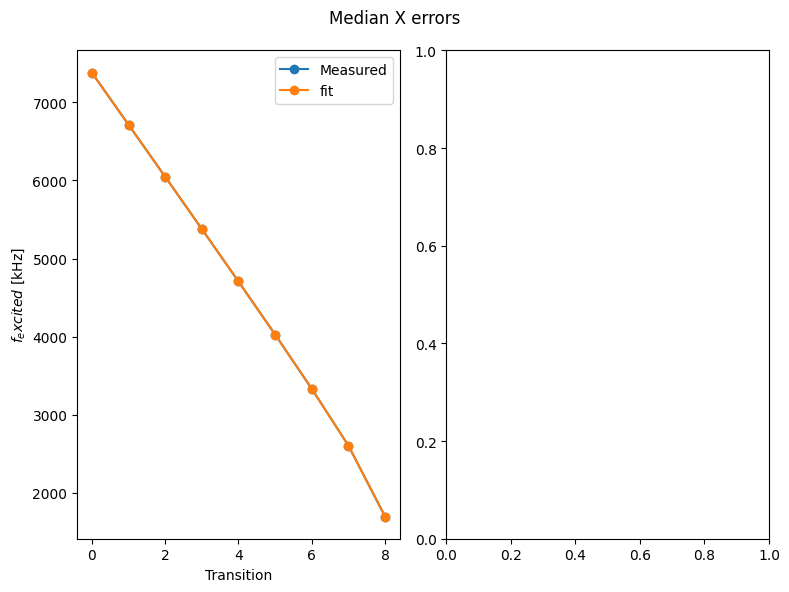

In [4]:
fitter_excited.run_MCMC(guess_exicted)

# Full

100%|██████████| 10000/10000 [08:57<00:00, 18.61it/s]


median x :  [ 4.49821867e+02  1.29901634e+02 -2.37051990e+02 -1.19426999e+01
 -1.49316564e+02  1.57213416e+00 -8.19207665e-01  7.77544182e-02]
best x :  [ 4.49821793e+02  1.29903247e+02 -2.37052120e+02 -1.19429795e+01
 -1.49316486e+02  1.57208408e+00 -8.19073512e-01  7.74371984e-02]


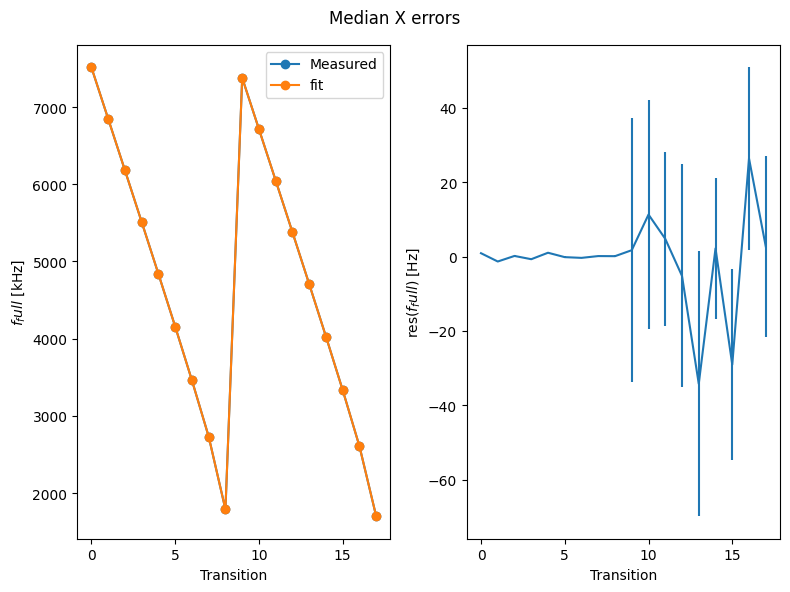

In [5]:
fitter_full.run_MCMC(best_x)

In [6]:
fitter_full.meas[:9]

array([7512.7863, 6847.1277, 6180.0567, 5510.6617, 4837.199 , 4156.1077,
       3459.0612, 2730.5331, 1787.5416])

c:\Users\manipp4\Documents\Leons_stuff\Spectroscopy_Hamiltonian_fitter-\protocolsClass.py:188: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(meas_to_plot[:9], 'o', marker = 'v', label= r"$\omega^{\downarrow}_{{n(n+1)}/2\pi}$", color = 'orange')
c:\Users\manipp4\Documents\Leons_stuff\Spectroscopy_Hamiltonian_fitter-\protocolsClass.py:189: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(meas_to_plot[9:], 'o', marker = '^', label= r"$\omega^{\uparrow}_{{n(n+1)}/2\pi}$", color = 'blue')
c:\Users\manipp4\Documents\Leons_stuff\Spectroscopy_Hamiltonian_fitter-\protocolsClass.py:196: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorb

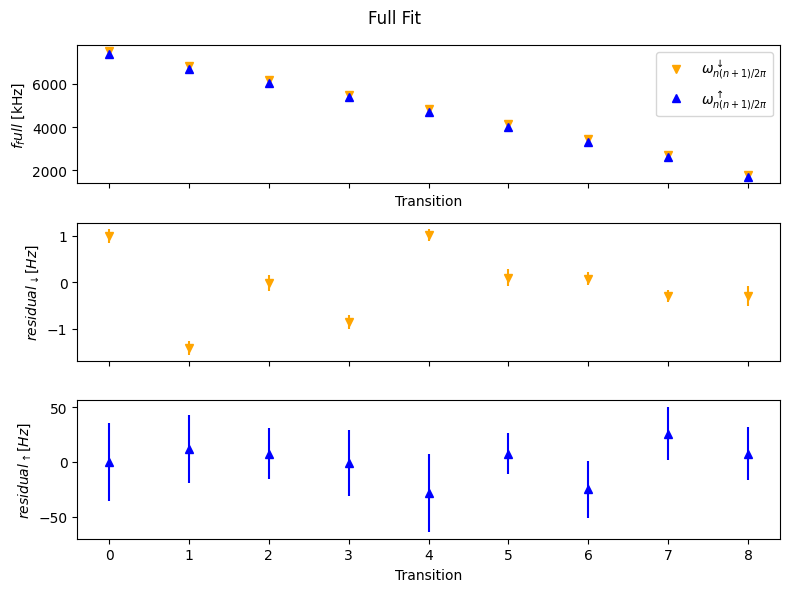

In [6]:
fitter_full.Plot_full(best_x)

In [ ]:
fitter_full.plot_levels_and_residuals_separated(median_x)

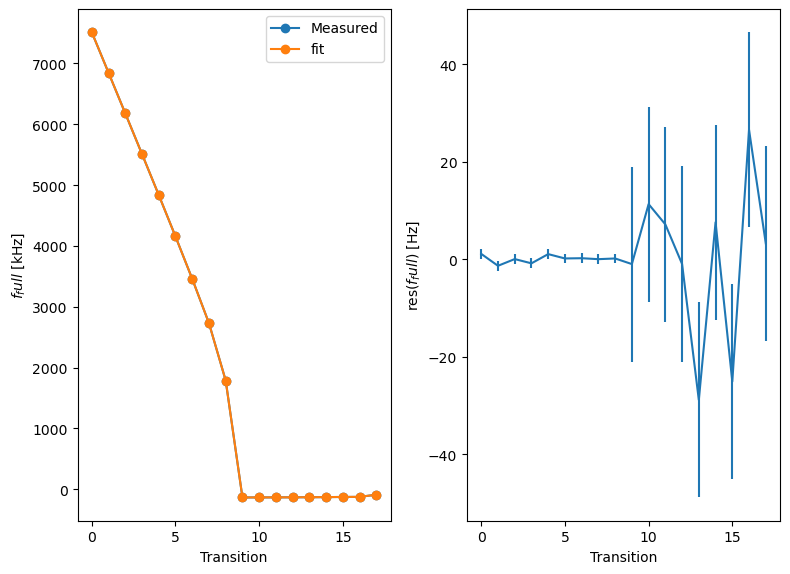

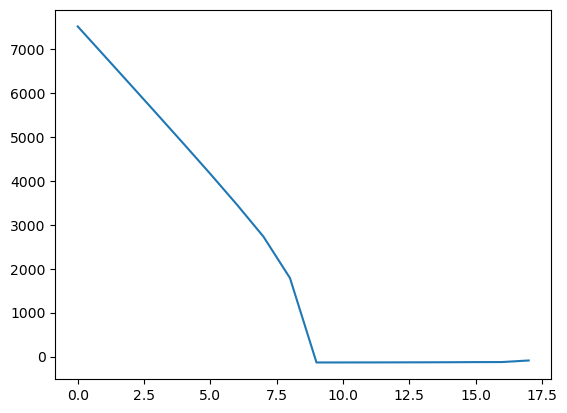

In [11]:
fitter_full.plot_levels_and_residuals_separated(fitter_full.median_x,'')
plt.plot(np.concatenate((ground_meas,manu_ramsey_meas)))

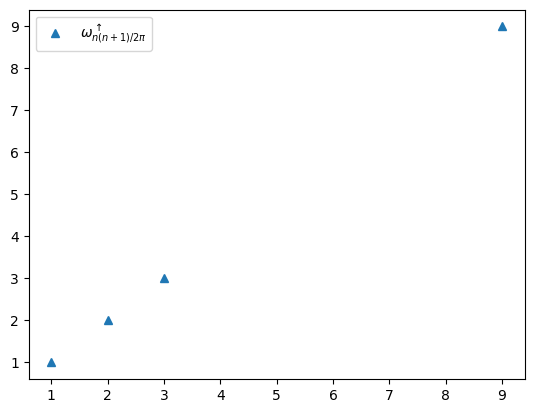

In [12]:
plt.plot([1,2,3,9], [1,2,3,9], '^', label= r"$\omega^{\uparrow}_{{n(n+1)}/2\pi}$")
plt.legend()
